<a href="https://colab.research.google.com/github/EsserMishelle/DataScience/blob/main/Mini_Project_session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Environment check (run in Colab)
import sys
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats

print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)

Python: 3.12.12
pandas: 2.2.2
numpy: 2.0.2
scipy: 1.16.3


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

data = {
    "id": range(1, 21),
    "age": [25, 30, None, 22, 120, 28, 27, None, 35, 29, 31, 27, 26, 24, None, 33, 40, -1, 29, 28],
    "income": [50000, 62000, 58000, None, 1_000_000, 54000, 52000, 51000, 60000, 59000,
               "65000", "not available", 48000, 47000, 45000, 70000, 72000, 68000, 66000, None],
    "join_date": ["2021-01-15", "2020/12/01", "15-02-2021", None, "2025-01-01",
                  "2021-06-03", "2021-07-15", "2021-07-20", "2021-08-01", "2021-09-10",
                  "2021-10-05", "2021-11-11", "2021-12-01", "2022-01-02", "2022-02-03", None, "2020-05-05", "2019-03-03", "2021-04-04", "2021-05-05"],
    "email": ["ALICE@example.COM", "bob@Example.com", " carol@example.com ", "dave@example", None,
              "emma@example.com", "frank@example.COM", "grace@Example.COM", "heidi@ex.com", "ivan@example.com",
              "judy@example.com", "kate@example.com", "leo@example.com", "mia@example.com", "nick@example.com",
              "oliver@example.com", "pam@example.com", "quinn@example.com", "ruth@example.com", "sam@example.com"],
    "notes": ["good", "", "n/a", None, "VIP customer", "follow up", "NA", "NA", "ok", "ok", "ok", "n/a", "", "good", None, "", "good", "ok", "n/a", "follow up"]
}

df = pd.DataFrame(data)
df.head(20)


,id,age,income,join_date,email,notes
0,1,25.0,50000,2021-01-15,ALICE@example.COM,good
1,2,30.0,62000,2020/12/01,bob@Example.com,
2,3,NaN,58000,15-02-2021,carol@example.com,n/a
3,4,22.0,None,None,dave@example,None
4,5,120.0,1000000,2025-01-01,None,VIP customer
5,6,28.0,54000,2021-06-03,emma@example.com,follow up
6,7,27.0,52000,2021-07-15,frank@example.COM,NA
7,8,NaN,51000,2021-07-20,grace@Example.COM,NA
8,9,35.0,60000,2021-08-01,heidi@ex.com,ok
9,10,29.0,59000,2021-09-10,ivan@example.com,ok


## 9 — Mini-project (exercise)
1. Use the provided `df`.  
2. Create a cleaned version `df_clean` that:
   - Ensures `age` is numeric and reasonable (0 < age <= 110), fill missing with median.  
   - Coerces `income` to numeric and caps at 99th percentile.  
   - Parses `join_date` and keeps only year and month as `YYYY-MM` string.  
   - Keeps only rows with valid emails.  
3. Produce summary counts: rows before/after cleaning, number of imputed ages, number of capped incomes.


In [ ]:
print(f'The shape of dataframe : ', {df.shape})
print()
print(f'The dataframe info: \n{df.info()}\n')
print()
print(f'The dataframe description: \n{df.describe(include='object')}\n')
print(f'The dataframe description: \n{df.describe()}\n')
rows_before_cleaning = len(df)
print(f'Total rows before cleaning: {rows_before_cleaning}')


The shape of dataframe :  {(20, 6)}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20 non-null     int64  
 1   age        17 non-null     float64
 2   income     18 non-null     object 
 3   join_date  18 non-null     object 
 4   email      19 non-null     object 
 5   notes      18 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB
The dataframe info: 
None


The dataframe description: 
        income   join_date              email notes
count       18          18                 19    18
unique      18          18                 19     7
top      50000  2021-01-15  ALICE@example.COM    ok
freq         1           1                  1     4

The dataframe description: 
             id         age
count  20.00000   17.000000
mean   10.50000   32.529412
std     5.91608   24.052333
min     1.00000   -1.0

In [ ]:
df[df['age'].isnull()]

,id,age,income,join_date,email,notes
2,3,NaN,58000,15-02-2021,carol@example.com,n/a
7,8,NaN,51000,2021-07-20,grace@Example.COM,NA
14,15,NaN,45000,2022-02-03,nick@example.com,None


In [ ]:
df.age.unique()

array([ 25.,  30.,  nan,  22., 120.,  28.,  27.,  35.,  29.,  31.,  26.,
        24.,  33.,  40.,  -1.])

In [ ]:
missing_df = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': df.isnull().sum() / df.shape[0]
})

print(missing_df)
age_missing_before = df['age'].isna().sum()
age_outliers_before = (df['age'] < 0) | (df['age'] > 110).sum()
age_outliers_before_mask = df[(df['age'] < 0)| (df['age'] > 110)]
age_outliers_before_mask


           missing_count  missing_percent
id                     0             0.00
age                    3             0.15
income                 2             0.10
join_date              2             0.10
email                  1             0.05
notes                  2             0.10


,id,age,income,join_date,email,notes
4,5,120.0,1000000,2025-01-01,None,VIP customer
17,18,-1.0,68000,2019-03-03,quinn@example.com,ok


In [ ]:
# Ensures age is numeric and reasonable (0 < age <= 110), fill missing with median.
print(f'Datatypes is:\n{df.dtypes}')
df.describe()

Datatypes is:
id             int64
age          float64
income        object
join_date     object
email         object
notes         object
dtype: object


,id,age
count,20.00000,17.000000
mean,10.50000,32.529412
std,5.91608,24.052333
min,1.00000,-1.000000
25%,5.75000,26.000000
50%,10.50000,28.000000
75%,15.25000,31.000000
max,20.00000,120.000000


<Axes: xlabel='age'>

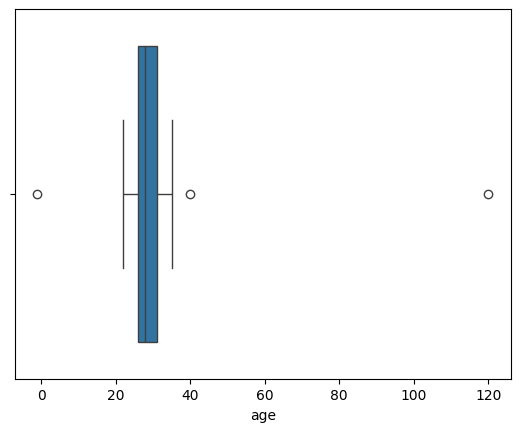

In [ ]:
import seaborn as sns
sns.boxplot(x=df['age'])

Outliers for 'age' are -1 and 120

<Axes: >

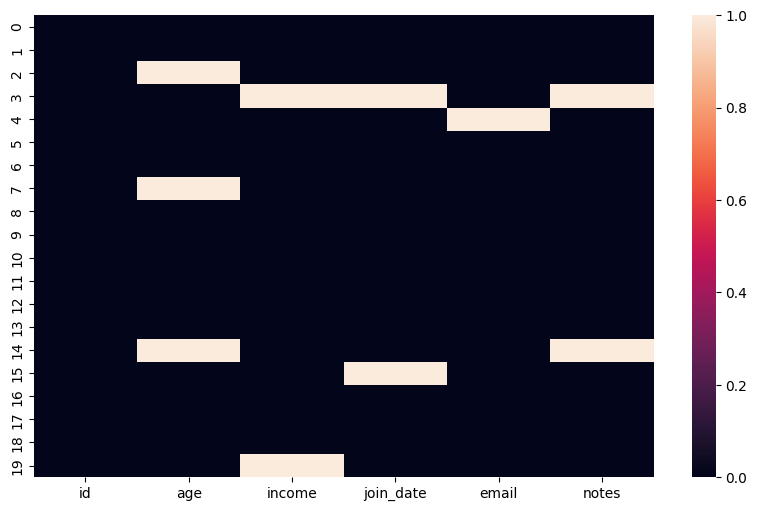

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())

Discovery and Suggestions:

* 'age' is a float64 datatype, which should be converted to an int64.
* It has 3 nulls entries, which is equivalent to 15%. It means we might not want to leave them as 'None'.
* The outliers are -1 (negative), 110 (extreme outliers) years old with a mean of 32.5 and mode of 28.  Mean is higher because of the row of 110 which adds more weights to the rest. 'age' should likely fall between 20-40. These values need to be imputed with median.


In [ ]:
# Counting missing and outliers before cleaning
import numpy as np

# Make a copy of age and name it age_raw
df['age_raw'] = df['age'].copy()

# Count invalid ages Before cleaning
invalid_mask = (df['age_raw'] < 0) | (df['age_raw'] > 110) | (df['age_raw'].isna())

age_imputed_before = invalid_mask.sum()
age_imputed_before
# 1 + 1 + 3 = 5

np.int64(5)

In [ ]:
# Cleaning 'age'

# Mark outliers as invalid values

df.loc[df['age'] < 0, 'age'] = np.nan
df.loc[df['age'] > 110, 'age'] = np.nan

# Fill in the all the NaN or missing values with median()
df['age_filled_median'] = df['age'].fillna(df['age'].median())
df['age'] = df['age_filled_median']
df


,id,age,income,join_date,email,notes,age_raw,age_filled_median
0,1,25.0,50000,2021-01-15,ALICE@example.COM,good,25.0,25.0
1,2,30.0,62000,2020/12/01,bob@Example.com,,30.0,30.0
2,3,28.0,58000,15-02-2021,carol@example.com,n/a,NaN,28.0
3,4,22.0,None,None,dave@example,None,22.0,22.0
4,5,28.0,1000000,2025-01-01,None,VIP customer,120.0,28.0
5,6,28.0,54000,2021-06-03,emma@example.com,follow up,28.0,28.0
6,7,27.0,52000,2021-07-15,frank@example.COM,NA,27.0,27.0
7,8,28.0,51000,2021-07-20,grace@Example.COM,NA,NaN,28.0
8,9,35.0,60000,2021-08-01,heidi@ex.com,ok,35.0,35.0
9,10,29.0,59000,2021-09-10,ivan@example.com,ok,29.0,29.0


In [ ]:
# Just to double check
df[['age', 'age_filled_median', 'age_raw']].describe()

,age,age_filled_median,age_raw
count,20.000000,20.000000,17.000000
mean,28.700000,28.700000,32.529412
std,3.908156,3.908156,24.052333
min,22.000000,22.000000,-1.000000
25%,27.000000,27.000000,26.000000
50%,28.000000,28.000000,28.000000
75%,29.250000,29.250000,31.000000
max,40.000000,40.000000,120.000000


In [ ]:
# Convert age to int
df['age'] = df['age'].astype(int)
df['age'].dtypes

dtype('int64')

## 9 — Mini-project (exercise)
  
   - Coerces `income` to numeric and caps at 99th percentile.  
   
3. Produce summary counts: rows before/after cleaning, number of imputed ages, number of capped incomes.


In [ ]:
df['income'].dtypes

dtype('O')

In [ ]:
# Find out what types of values
df['income'].unique() # We have 'not avalible', 'None'

array([50000, 62000, 58000, None, 1000000, 54000, 52000, 51000, 60000,
       59000, '65000', 'not available', 48000, 47000, 45000, 70000, 72000,
       68000, 66000], dtype=object)

In [ ]:
# Cleaning 'income'
# 1. Make a copy of the income and name it as income_raw
df['income_raw'] = df['income'].copy()

# 2. Convert errors to NA
df['income'] =pd.to_numeric(df['income_raw'], errors= 'coerce')

print(f'Income datatype is: \n{df['income'].dtypes}\n')
income_missing_before = df['income'].isna().sum()
print(f'Income mssing before cleaning has {income_missing_before} rows')

df

Income datatype is: 
float64

Income mssing before cleaning has 3 rows


,id,age,income,join_date,email,notes,age_raw,age_filled_median,income_raw
0,1,25,50000.0,2021-01-15,ALICE@example.COM,good,25.0,25.0,50000
1,2,30,62000.0,2020/12/01,bob@Example.com,,30.0,30.0,62000
2,3,28,58000.0,15-02-2021,carol@example.com,n/a,NaN,28.0,58000
3,4,22,NaN,None,dave@example,None,22.0,22.0,None
4,5,28,1000000.0,2025-01-01,None,VIP customer,120.0,28.0,1000000
5,6,28,54000.0,2021-06-03,emma@example.com,follow up,28.0,28.0,54000
6,7,27,52000.0,2021-07-15,frank@example.COM,NA,27.0,27.0,52000
7,8,28,51000.0,2021-07-20,grace@Example.COM,NA,NaN,28.0,51000
8,9,35,60000.0,2021-08-01,heidi@ex.com,ok,35.0,35.0,60000
9,10,29,59000.0,2021-09-10,ivan@example.com,ok,29.0,29.0,59000


In [ ]:
# capping income at 99th percentile

income_99percentile = df['income'].quantile(.99)

num_capped = (df['income'] > income_99percentile).sum()
df.loc[df['income'] > income_99percentile, 'income'] = income_99percentile
print(f'Number of rows capped: {num_capped}')
df[['income', 'income_raw']]

Number of rows capped: 1


,income,income_raw
0,50000.0,50000
1,62000.0,62000
2,58000.0,58000
3,NaN,None
4,851520.0,1000000
5,54000.0,54000
6,52000.0,52000
7,51000.0,51000
8,60000.0,60000
9,59000.0,59000


<Axes: xlabel='income', ylabel='Count'>

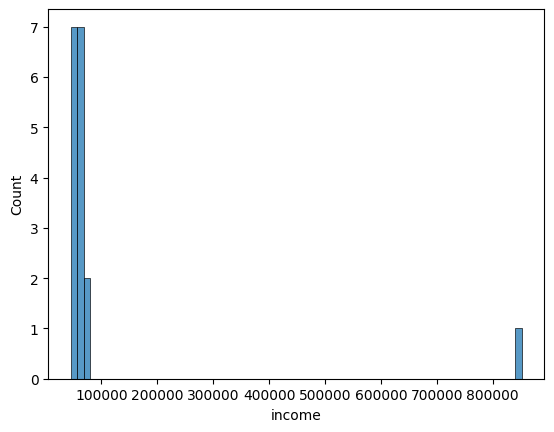

In [ ]:
sns.histplot(df['income'])

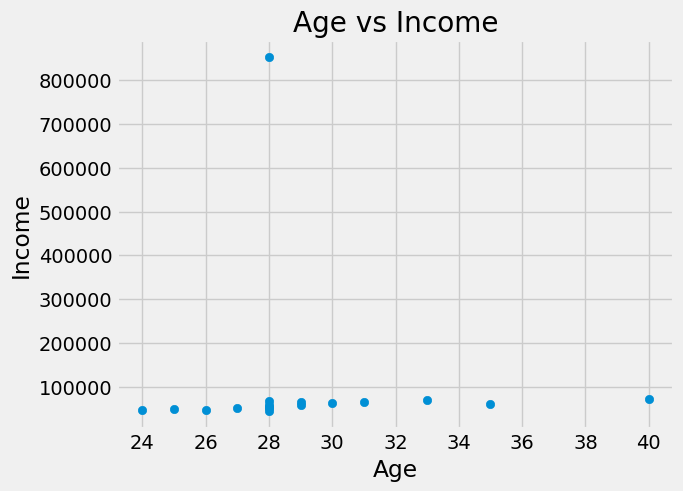

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('fivethirtyeight'):
  plt.scatter(df['age'], df['income'])
  plt.xlabel('Age')
  plt.ylabel('Income')
  plt.title('Age vs Income')
  plt.show

In [ ]:
df.corr(numeric_only=True)

,id,age,income,age_raw,age_filled_median
id,1.000000,0.314137,-0.218788,-0.263339,0.314137
age,0.314137,1.000000,-0.050990,0.144786,1.000000
income,-0.218788,-0.050990,1.000000,0.938019,-0.050990
age_raw,-0.263339,0.144786,0.938019,1.000000,0.144786
age_filled_median,0.314137,1.000000,-0.050990,0.144786,1.000000


## 9 — Mini-project (exercise)
   - Parses `join_date` and keeps only year and month as `YYYY-MM` string.  
   


In [ ]:
from pandas.core.arrays.boolean import coerce_to_array
#  Make a copy of the join_date
df['join_date_raw'] = df['join_date'].copy()

# Convert to daetime using format = mixed
df['join_date_parsed'] = pd.to_datetime(df['join_date'], format= 'mixed')

# Convert to datetime and only keep year and month
df['join_date_year_month'] = df['join_date_parsed'].dt.strftime('%Y-%m')

df[['join_date','join_date_raw', 'join_date_parsed', 'join_date_year_month']]

,join_date,join_date_raw,join_date_parsed,join_date_year_month
0,2021-01-15,2021-01-15,2021-01-15,2021-01
1,2020/12/01,2020/12/01,2020-12-01,2020-12
2,15-02-2021,15-02-2021,2021-02-15,2021-02
3,None,None,NaT,NaN
4,2025-01-01,2025-01-01,2025-01-01,2025-01
5,2021-06-03,2021-06-03,2021-06-03,2021-06
6,2021-07-15,2021-07-15,2021-07-15,2021-07
7,2021-07-20,2021-07-20,2021-07-20,2021-07
8,2021-08-01,2021-08-01,2021-08-01,2021-08
9,2021-09-10,2021-09-10,2021-09-10,2021-09


## 9 — Mini-project (exercise)

   - Keeps only rows with valid emails.  
3. Produce summary counts: rows before/after cleaning, number of imputed ages, number of capped incomes.


In [ ]:
# Make a copy of email

df['email_raw'] = df['email'].copy()

df['email'].unique()


array(['ALICE@example.COM', 'bob@Example.com', ' carol@example.com ',
       'dave@example', None, 'emma@example.com', 'frank@example.COM',
       'grace@Example.COM', 'heidi@ex.com', 'ivan@example.com',
       'judy@example.com', 'kate@example.com', 'leo@example.com',
       'mia@example.com', 'nick@example.com', 'oliver@example.com',
       'pam@example.com', 'quinn@example.com', 'ruth@example.com',
       'sam@example.com'], dtype=object)

In [ ]:
df['email'].describe()

,email
count,19
unique,19
top,ALICE@example.COM
freq,1


In [ ]:
# Cleaning email by lower the case and space removal
df["email_clean"] = df["email"].str.strip().str.lower()
df

,id,age,income,join_date,email,notes,age_raw,age_filled_median,income_raw,join_date_raw,join_date_parsed,join_date_year_month,email_raw,email_clean
0,1,25,50000.0,2021-01-15,ALICE@example.COM,good,25.0,25.0,50000,2021-01-15,2021-01-15,2021-01,ALICE@example.COM,alice@example.com
1,2,30,62000.0,2020/12/01,bob@Example.com,,30.0,30.0,62000,2020/12/01,2020-12-01,2020-12,bob@Example.com,bob@example.com
2,3,28,58000.0,15-02-2021,carol@example.com,n/a,NaN,28.0,58000,15-02-2021,2021-02-15,2021-02,carol@example.com,carol@example.com
3,4,22,NaN,None,dave@example,None,22.0,22.0,None,None,NaT,NaN,dave@example,dave@example
4,5,28,851520.0,2025-01-01,None,VIP customer,120.0,28.0,1000000,2025-01-01,2025-01-01,2025-01,None,None
5,6,28,54000.0,2021-06-03,emma@example.com,follow up,28.0,28.0,54000,2021-06-03,2021-06-03,2021-06,emma@example.com,emma@example.com
6,7,27,52000.0,2021-07-15,frank@example.COM,NA,27.0,27.0,52000,2021-07-15,2021-07-15,2021-07,frank@example.COM,frank@example.com
7,8,28,51000.0,2021-07-20,grace@Example.COM,NA,NaN,28.0,51000,2021-07-20,2021-07-20,2021-07,grace@Example.COM,grace@example.com
8,9,35,60000.0,2021-08-01,heidi@ex.com,ok,35.0,35.0,60000,2021-08-01,2021-08-01,2021-08,heidi@ex.com,heidi@ex.com
9,10,29,59000.0,2021-09-10,ivan@example.com,ok,29.0,29.0,59000,2021-09-10,2021-09-10,2021-09,ivan@example.com,ivan@example.com


In [ ]:
# Validate with a stronr regex
email_regex = r"^[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}$"

df["email_valid"] = df["email_clean"].str.contains(email_regex, na=False)
df["email_domain"] = df["email_clean"].str.extract(r"@([^@]+)$", expand=False)

# Filters only valid email addresses
df_clean = df[df["email_valid"]==True]
df_clean

,id,age,income,join_date,email,notes,age_raw,age_filled_median,income_raw,join_date_raw,join_date_parsed,join_date_year_month,email_raw,email_clean,email_valid,email_domain
0,1,25,50000.0,2021-01-15,ALICE@example.COM,good,25.0,25.0,50000,2021-01-15,2021-01-15,2021-01,ALICE@example.COM,alice@example.com,True,example.com
1,2,30,62000.0,2020/12/01,bob@Example.com,,30.0,30.0,62000,2020/12/01,2020-12-01,2020-12,bob@Example.com,bob@example.com,True,example.com
2,3,28,58000.0,15-02-2021,carol@example.com,n/a,NaN,28.0,58000,15-02-2021,2021-02-15,2021-02,carol@example.com,carol@example.com,True,example.com
5,6,28,54000.0,2021-06-03,emma@example.com,follow up,28.0,28.0,54000,2021-06-03,2021-06-03,2021-06,emma@example.com,emma@example.com,True,example.com
6,7,27,52000.0,2021-07-15,frank@example.COM,NA,27.0,27.0,52000,2021-07-15,2021-07-15,2021-07,frank@example.COM,frank@example.com,True,example.com
7,8,28,51000.0,2021-07-20,grace@Example.COM,NA,NaN,28.0,51000,2021-07-20,2021-07-20,2021-07,grace@Example.COM,grace@example.com,True,example.com
8,9,35,60000.0,2021-08-01,heidi@ex.com,ok,35.0,35.0,60000,2021-08-01,2021-08-01,2021-08,heidi@ex.com,heidi@ex.com,True,ex.com
9,10,29,59000.0,2021-09-10,ivan@example.com,ok,29.0,29.0,59000,2021-09-10,2021-09-10,2021-09,ivan@example.com,ivan@example.com,True,example.com
10,11,31,65000.0,2021-10-05,judy@example.com,ok,31.0,31.0,65000,2021-10-05,2021-10-05,2021-10,judy@example.com,judy@example.com,True,example.com
11,12,27,NaN,2021-11-11,kate@example.com,n/a,27.0,27.0,not available,2021-11-11,2021-11-11,2021-11,kate@example.com,kate@example.com,True,example.com


## 9 — Mini-project (exercise)

3. Produce summary counts: rows before/after cleaning, number of imputed ages, number of capped incomes.


In [ ]:
# Here is the final df_clean DataFrame of the columns we want to keep

df_clean = df_clean[['id',
               'age',
               'income',
               'join_date_year_month',
               'email_clean',
               'notes']]
df_clean

,id,age,income,join_date_year_month,email_clean,notes
0,1,25,50000.0,2021-01,alice@example.com,good
1,2,30,62000.0,2020-12,bob@example.com,
2,3,28,58000.0,2021-02,carol@example.com,n/a
5,6,28,54000.0,2021-06,emma@example.com,follow up
6,7,27,52000.0,2021-07,frank@example.com,NA
7,8,28,51000.0,2021-07,grace@example.com,NA
8,9,35,60000.0,2021-08,heidi@ex.com,ok
9,10,29,59000.0,2021-09,ivan@example.com,ok
10,11,31,65000.0,2021-10,judy@example.com,ok
11,12,27,NaN,2021-11,kate@example.com,n/a


In [ ]:
print(f'Summary counts: rows before cleaning: {rows_before_cleaning},\n rows after cleaning: {df_clean.shape[0]},\n number of imputed ages: {age_imputed_before},\n number of capped incomes: {num_capped}.')

Summary counts: rows before cleaning: 20,
 rows after cleaning: 18,
 number of imputed ages: 5,
 number of capped incomes: 1.


## 10 — Further exercises and suggestions
- Try different imputation strategies: mean vs median vs KNN imputation (sklearn).  
- Experiment with winsorizing vs log-transform for skewed distributions.  
- Build a small pipeline function that accepts a DataFrame and returns a cleaned DataFrame.  
- Version your cleaning steps in a notebook so transformations are reproducible.


In [ ]:
np.random.seed(42)

data = {
    "id": range(1, 21),
    "age": [25, 30, None, 22, 120, 28, 27, None, 35, 29, 31, 27, 26, 24, None, 33, 40, -1, 29, 28],
    "income": [50000, 62000, 58000, None, 1_000_000, 54000, 52000, 51000, 60000, 59000,
               "65000", "not available", 48000, 47000, 45000, 70000, 72000, 68000, 66000, None],
    "join_date": ["2021-01-15", "2020/12/01", "15-02-2021", None, "2025-01-01",
                  "2021-06-03", "2021-07-15", "2021-07-20", "2021-08-01", "2021-09-10",
                  "2021-10-05", "2021-11-11", "2021-12-01", "2022-01-02", "2022-02-03", None, "2020-05-05", "2019-03-03", "2021-04-04", "2021-05-05"],
    "email": ["ALICE@example.COM", "bob@Example.com", " carol@example.com ", "dave@example", None,
              "emma@example.com", "frank@example.COM", "grace@Example.COM", "heidi@ex.com", "ivan@example.com",
              "judy@example.com", "kate@example.com", "leo@example.com", "mia@example.com", "nick@example.com",
              "oliver@example.com", "pam@example.com", "quinn@example.com", "ruth@example.com", "sam@example.com"],
    "notes": ["good", "", "n/a", None, "VIP customer", "follow up", "NA", "NA", "ok", "ok", "ok", "n/a", "", "good", None, "", "good", "ok", "n/a", "follow up"]
}

df = pd.DataFrame(data)
df.head(20)

,id,age,income,join_date,email,notes
0,1,25.0,50000,2021-01-15,ALICE@example.COM,good
1,2,30.0,62000,2020/12/01,bob@Example.com,
2,3,NaN,58000,15-02-2021,carol@example.com,n/a
3,4,22.0,None,None,dave@example,None
4,5,120.0,1000000,2025-01-01,None,VIP customer
5,6,28.0,54000,2021-06-03,emma@example.com,follow up
6,7,27.0,52000,2021-07-15,frank@example.COM,NA
7,8,NaN,51000,2021-07-20,grace@Example.COM,NA
8,9,35.0,60000,2021-08-01,heidi@ex.com,ok
9,10,29.0,59000,2021-09-10,ivan@example.com,ok


## 10 — Further exercises and suggestions
- Try different imputation strategies: mean vs median vs KNN imputation (sklearn).  



In [ ]:
# Testing it with 'age' column
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Make a copy of age and name it age_raw
df['age_raw'] = df['age'].copy()

# convert to numeric
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# convert outliers
age_invalid_mask = (df["age"] < 0) | (df["age"] > 110) | (df["age"].isna())
df['age_clean'] = df['age'].where(~age_invalid_mask, np.nan)

# mean
df['age_mean'] = df['age_clean'].fillna(df['age'].mean())

# median
df['age_median'] = df['age_clean'].fillna(df['age'].median())

# KNN numeric subset
df_knn = df[['age_clean', 'income']].copy()

# KNN
imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = imputer.fit_transform(df_knn)

# Assign KNN back to df
df['age_knn'] = df_knn_imputed[:, 0]
df['income_knn'] = df_knn_imputed[:, 1]

df[['age', 'age_raw', 'age_clean', 'age_mean', 'age_median', 'age_knn', 'income_knn']].head(20)

,age,age_raw,age_clean,age_mean,age_median,age_knn,income_knn
0,25.0,25.0,25.0,25.000000,25.0,25.000000,50000.000000
1,30.0,30.0,30.0,30.000000,30.0,30.000000,62000.000000
2,NaN,NaN,NaN,32.529412,28.0,30.666667,58000.000000
3,22.0,22.0,22.0,22.000000,22.0,22.000000,48333.333333
4,120.0,120.0,NaN,32.529412,28.0,34.000000,1000000.000000
5,28.0,28.0,28.0,28.000000,28.0,28.000000,54000.000000
6,27.0,27.0,27.0,27.000000,27.0,27.000000,52000.000000
7,NaN,NaN,NaN,32.529412,28.0,26.000000,51000.000000
8,35.0,35.0,35.0,35.000000,35.0,35.000000,60000.000000
9,29.0,29.0,29.0,29.000000,29.0,29.000000,59000.000000


## 10 — Further exercises and suggestions

- Experiment with winsorizing vs log-transform for skewed distributions.  


In [ ]:
# Winsorize income with using quantiles

lower = df['income'].quantile(0.05)
upper = df['income'].quantile(0.95)

df['income_winsorized'] = df['income'].clip(lower, upper)
df[["income", "income_winsorized"]].head(20)

,income,income_winsorized
0,50000.0,50000.0
1,62000.0,62000.0
2,58000.0,58000.0
3,NaN,NaN
4,1000000.0,257600.0
5,54000.0,54000.0
6,52000.0,52000.0
7,51000.0,51000.0
8,60000.0,60000.0
9,59000.0,59000.0


In [ ]:
# Log
import numpy as np
df['income_log'] = np.log1p(df['income'])
df

,id,age,income,join_date,email,notes,age_raw,age_clean,age_mean,age_median,age_knn,income_knn,incomee_winsorized,income_winsorized,income_log
0,1,25.0,50000.0,2021-01-15,ALICE@example.COM,good,25.0,25.0,25.000000,25.0,25.000000,50000.000000,50000.0,50000.0,10.819798
1,2,30.0,62000.0,2020/12/01,bob@Example.com,,30.0,30.0,30.000000,30.0,30.000000,62000.000000,62000.0,62000.0,11.034906
2,3,NaN,58000.0,15-02-2021,carol@example.com,n/a,NaN,NaN,32.529412,28.0,30.666667,58000.000000,58000.0,58000.0,10.968216
3,4,22.0,NaN,None,dave@example,None,22.0,22.0,22.000000,22.0,22.000000,48333.333333,NaN,NaN,NaN
4,5,120.0,1000000.0,2025-01-01,None,VIP customer,120.0,NaN,32.529412,28.0,34.000000,1000000.000000,257600.0,257600.0,13.815512
5,6,28.0,54000.0,2021-06-03,emma@example.com,follow up,28.0,28.0,28.000000,28.0,28.000000,54000.000000,54000.0,54000.0,10.896758
6,7,27.0,52000.0,2021-07-15,frank@example.COM,NA,27.0,27.0,27.000000,27.0,27.000000,52000.000000,52000.0,52000.0,10.859018
7,8,NaN,51000.0,2021-07-20,grace@Example.COM,NA,NaN,NaN,32.529412,28.0,26.000000,51000.000000,51000.0,51000.0,10.839601
8,9,35.0,60000.0,2021-08-01,heidi@ex.com,ok,35.0,35.0,35.000000,35.0,35.000000,60000.000000,60000.0,60000.0,11.002117
9,10,29.0,59000.0,2021-09-10,ivan@example.com,ok,29.0,29.0,29.000000,29.0,29.000000,59000.000000,59000.0,59000.0,10.985310


array([[<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'income_winsorized'}>],
       [<Axes: title={'center': 'income_log'}>, <Axes: >]], dtype=object)

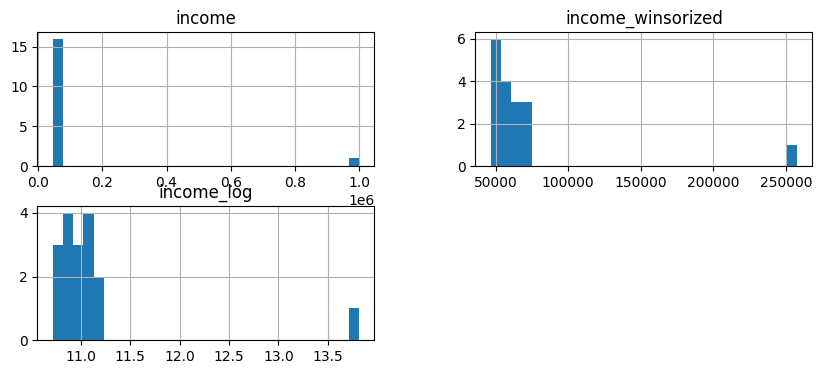

In [ ]:
df[['income', 'income_winsorized', 'income_log']].hist(bins=30, figsize=(10,4))

## 10 — Further exercises and suggestions

- Build a small pipeline function that accepts a DataFrame and returns a cleaned DataFrame.  



In [ ]:
def clean_my_df(df):
  df = df.copy()

  # 1. clean age
  df['age_raw'] = df['age'].copy()
  df["age"] = pd.to_numeric(df["age"], errors="coerce")
  # convert outliers
  age_invalid_mask = (df["age"] < 0) | (df["age"] >= 110) | (df["age"].isna())
  df['age'] = df['age'].where(~age_invalid_mask, np.nan)

  # mean
  df['age'] = df['age'].fillna(df['age'].mean())
  # convert to int
  df['age']= df['age'].astype(int)

  # 2. Clean income
  df['income_raw'] = df['income'].copy()
  df["income"] = pd.to_numeric(df["income"], errors="coerce")
  income_upper_cap = df["income"].quantile(0.99)
  df["income"] = df["income"].clip(upper=income_upper_cap)

  # 3. Clean email
  df['email_raw'] = df['email'].copy()
  df["email_clean"] = df["email"].str.strip().str.lower()

  email_regex = r"^[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}$"
  df["email_valid"] = df["email_clean"].str.contains(email_regex, na=False)
  df=df[df['email_valid']==True].copy()

  # 4. Clean join_date
  df['join_date_raw'] = df['join_date'].copy()
  df["join_date"] = pd.to_datetime(df["join_date"], errors="coerce")
  df["join_date_ym"] = df["join_date"].dt.strftime("%Y-%m")

  return df

df_cleaned = clean_my_df(df)
df_cleaned.head(20)

,id,age,income,join_date,email,notes,age_raw,income_raw,email_raw,email_clean,email_valid,join_date_raw,join_date_ym
0,1,25,50000.0,2021-01-15,ALICE@example.COM,good,25.0,50000,ALICE@example.COM,alice@example.com,True,2021-01-15,2021-01
1,2,30,62000.0,NaT,bob@Example.com,,30.0,62000,bob@Example.com,bob@example.com,True,2020/12/01,NaN
2,3,28,58000.0,NaT,carol@example.com,n/a,NaN,58000,carol@example.com,carol@example.com,True,15-02-2021,NaN
5,6,28,54000.0,2021-06-03,emma@example.com,follow up,28.0,54000,emma@example.com,emma@example.com,True,2021-06-03,2021-06
6,7,27,52000.0,2021-07-15,frank@example.COM,NA,27.0,52000,frank@example.COM,frank@example.com,True,2021-07-15,2021-07
7,8,28,51000.0,2021-07-20,grace@Example.COM,NA,NaN,51000,grace@Example.COM,grace@example.com,True,2021-07-20,2021-07
8,9,35,60000.0,2021-08-01,heidi@ex.com,ok,35.0,60000,heidi@ex.com,heidi@ex.com,True,2021-08-01,2021-08
9,10,29,59000.0,2021-09-10,ivan@example.com,ok,29.0,59000,ivan@example.com,ivan@example.com,True,2021-09-10,2021-09
10,11,31,65000.0,2021-10-05,judy@example.com,ok,31.0,65000,judy@example.com,judy@example.com,True,2021-10-05,2021-10
11,12,27,NaN,2021-11-11,kate@example.com,n/a,27.0,not available,kate@example.com,kate@example.com,True,2021-11-11,2021-11
